## **Introdução**

Neste projeto, buscamos analisar e prever os custos médicos individuais com base nas características dos pacientes. Para isso, utilizamos o dataset **Healthcare Data**, disponível no Kaggle, criado por **Sahil Bajaj**. Este conjunto de dados contém informações detalhadas sobre hospitalização, exames médicos, histórico de saúde e características pessoais de pacientes, incluindo dados sobre doenças pré-existentes, histórico de transplantes, hábitos de fumo, e o número de cirurgias realizadas.

### **Motivação**
A motivação para a escolha deste dataset foi a crescente importância da análise de dados de saúde na medicina preditiva. Com o aumento dos custos médicos, a capacidade de prever esses custos com base em variáveis do histórico médico e estilo de vida pode ser uma ferramenta valiosa para hospitais, seguradoras e pesquisadores. Através deste projeto, visamos desenvolver modelos de aprendizado de máquina que possam prever com precisão os custos médicos de indivíduos, ajudando na tomada de decisões mais eficientes e na alocação de recursos no sistema de saúde.

### **Fonte dos Dados**
Os dados utilizados para este projeto foram obtidos do Kaggle, especificamente do dataset [Healthcare Data](https://www.kaggle.com/datasets/sahilnbajaj/healthcare-data), desenvolvido por **Sahil Bajaj**. O conjunto de dados foi escolhido por sua relevância no contexto da saúde e por abranger diversas variáveis que podem influenciar os custos médicos, tornando-o um ótimo ponto de partida para análises e modelagens preditivas.

Com base neste dataset, aplicamos técnicas de pré-processamento e treinamento de modelos de regressão para prever os custos médicos dos pacientes, com o objetivo de obter insights sobre os fatores que mais impactam esses custos.


# **Bibliotecas Utilizadas**

## **Bibliotecas de Manipulação e Análise de Dados**
- **`pandas`**: Manipulação de dados estruturados, como DataFrames e Séries, essencial para leitura, limpeza e transformação de dados.
- **`numpy`**: Realiza operações matemáticas e manipulação de arrays, com foco em eficiência computacional.

## **Bibliotecas de Visualização**
- **`matplotlib.pyplot`**: Biblioteca principal para criação de gráficos em Python, como gráficos de dispersão, barras, linhas, entre outros.
- **`seaborn`**: Baseada no `matplotlib`, oferece uma interface de alto nível para visualizações estatísticas mais elegantes e fáceis de usar.

## **Bibliotecas de Pré-processamento e Avaliação**
- **`sklearn.model_selection.train_test_split`**: Função que divide os dados em conjuntos de treino e teste, fundamental para avaliação de modelos.
- **`sklearn.compose.ColumnTransformer`**: Aplica diferentes transformações (como normalização e codificação) em colunas específicas de um DataFrame.
- **`sklearn.preprocessing.OneHotEncoder`**: Converte variáveis categóricas em variáveis numéricas binárias, usando codificação "one-hot".
- **`sklearn.preprocessing.StandardScaler`**: Normaliza variáveis numéricas para que tenham média zero e desvio padrão 1, essencial para muitos modelos de aprendizado de máquina.
- **`sklearn.metrics.mean_squared_error`**: Calcula o erro quadrático médio (RMSE), útil para medir o desempenho dos modelos de regressão.
- **`sklearn.metrics.mean_absolute_error`**: Calcula o erro absoluto médio (MAE), usado para avaliar a precisão do modelo.
- **`sklearn.metrics.r2_score`**: Mede o coeficiente de determinação (R²), que indica o quão bem os dados se ajustam ao modelo de regressão.

## **Bibliotecas de Modelagem**
- **Modelos Lineares**:
  - **`sklearn.linear_model.LinearRegression`**: Regressão Linear Simples, útil para modelar relações lineares entre variáveis.
  - **`sklearn.linear_model.BayesianRidge`**: Regressão Bayesiana com regularização, ideal para quando se quer incorporar incertezas nas previsões.
  - **`sklearn.linear_model.ElasticNet`**: Combinação de regressões Lasso e Ridge, usada para penalizar tanto as somas absolutas quanto as quadradas dos coeficientes.
  - **`sklearn.linear_model.HuberRegressor`**: Regressão robusta que utiliza a função de perda Huber, menos sensível a outliers.

- **Modelos de Árvores e Conjuntos**:
  - **`sklearn.tree.DecisionTreeRegressor`**: Modelo baseado em árvore de decisão, onde as previsões são feitas com base nas características dos dados divididos.
  - **`sklearn.ensemble.RandomForestRegressor`**: Ensemble de árvores de decisão, utilizado para melhorar a precisão e reduzir o overfitting.
  - **`sklearn.ensemble.GradientBoostingRegressor`**: Técnica de boosting, onde múltiplos modelos são treinados de forma sequencial para corrigir os erros do modelo anterior.

- **Outros Modelos**:
  - **`sklearn.svm.SVR`**: Regressão com Máquinas de Vetores de Suporte, útil para modelar relações não lineares entre variáveis.
  - **`sklearn.neighbors.KNeighborsRegressor`**: Regressão baseada nos k-vizinhos mais próximos, útil quando as amostras estão agrupadas por similaridade.
  - **`sklearn.neural_network.MLPRegressor`**: Utiliza redes neurais multi-layer perceptron (MLP) para modelar relações co


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### **# Carregar os arquivos CSV**
O comando carrega três conjuntos de dados em diferentes formatos de arquivos:

- **`pd.read_csv()`**: Lê os arquivos CSV e os converte em DataFrames do pandas.
  - **`dados_hospitalisation`**: Carrega os detalhes de hospitalização a partir de um arquivo CSV.
  - **`dados_medical`**: Carrega os dados de exames médicos a partir de outro arquivo CSV.
- **`pd.read_excel()`**: Lê o arquivo Excel contendo os nomes dos clientes e o converte em um DataFrame.
  - **`dados_name`**: Carrega os dados relacionados aos nomes dos clientes.

### **Funcionamento**
Esses dados são carregados em três variáveis (`dados_hospitalisation`, `dados_medical`, `dados_name`) que podem ser manipuladas posteriormente no código.

### **Utilidade**
Esses dados são a base para a análise e o processamento subsequente, permitindo integrar as informações e realizar análises de hospitalização, exames médicos e nomes de clientes.


In [2]:
# Carregar os arquivos CSV
dados_hospitalisation = pd.read_csv("healthcare-data-Hospitalisation details.csv")
dados_medical = pd.read_csv("healthcare-data-Medical Examinations.csv")

# Não achamos necessário realizar a inclusão desta base pois contém apenas o Customer ID e o Name
#dados_name = pd.read_excel("healthcare-data-Names.xlsx")

### **# Relacionar o dados_medical com dados_hospitalisation**
O comando utiliza a função `pd.merge()` para combinar os DataFrames `dados_medical` e `dados_hospitalisation` com base na coluna comum **`Customer ID`**:

- **`on="Customer ID"`**: Especifica a coluna pela qual os dois DataFrames devem ser unidos. Nesse caso, a coluna **`Customer ID`** é a chave de junção.
- **`how="inner"`**: Realiza uma junção interna, ou seja, apenas as linhas que possuem correspondência em ambas as tabelas serão incluídas no DataFrame resultante.

### **Funcionamento**
O comando cria um novo DataFrame **`dados`** que contém os dados combinados de `dados_medical` e `dados_hospitalisation`, para os clientes que têm registros em ambas as tabelas.

### **Utilidade**
Essa operação é fundamental para combinar informações de diferentes fontes (exames médicos e hospitalização) em uma única tabela, facilitando a análise integrada dos dados dos clientes.


In [3]:
# Relacionar o dados_medical com dados_hospitalisation
dados = pd.merge(dados_medical, dados_hospitalisation, on="Customer ID", how="inner")

dados.head()

# Relacionar dados_name e o dados
#dados = pd.merge(dados_name, dados, on="Customer ID", how="inner")

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id1,47.410,7.47,No,No,No,No major surgery,yes,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013
1,Id2,30.360,5.77,No,No,No,No major surgery,yes,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013
2,Id3,34.485,11.87,yes,No,No,2,yes,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012
3,Id4,38.095,6.05,No,No,No,No major surgery,yes,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024
4,Id5,35.530,5.45,No,No,No,No major surgery,yes,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012


### **# Verifica informações iniciais do DataFrame**

1. **`print(dados.info())`**:
   - Exibe informações gerais sobre o DataFrame **`dados`**, como o número de entradas, tipos de dados das colunas e a quantidade de valores não nulos em cada coluna.


### **# Remove linhas com valores nulos**

1. **`dados = dados.dropna()`**:
   - Remove todas as linhas do DataFrame **`dados`** que contêm valores nulos (`NaN`), garantindo que o DataFrame resultante não tenha dados ausentes.

### **Funcionamento**
- O primeiro comando imprime as características do DataFrame, ajudando a entender a estrutura dos dados e identificar colunas com valores ausentes.
- O segundo comando remove as linhas que têm dados ausentes, o que pode ser necessário antes de aplicar modelos de aprendizado de máquina, que geralmente não lidam bem com valores nulos.

### **Utilidade**
Esses comandos são úteis para garantir que o DataFrame esteja em um formato limpo e adequado para análise ou treinamento de modelos, eliminando registros incompletos.


In [4]:
# Verificar informações iniciais do DataFrame
print(dados.info())

# Remover linhas com valores nulos
dados = dados.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   BMI                     2335 non-null   float64
 2   HBA1C                   2335 non-null   float64
 3   Heart Issues            2335 non-null   object 
 4   Any Transplants         2335 non-null   object 
 5   Cancer history          2335 non-null   object 
 6   NumberOfMajorSurgeries  2335 non-null   object 
 7   smoker                  2335 non-null   object 
 8   year                    2335 non-null   object 
 9   month                   2335 non-null   object 
 10  date                    2335 non-null   int64  
 11  children                2335 non-null   int64  
 12  charges                 2335 non-null   float64
 13  Hospital tier           2335 non-null   object 
 14  City tier               2335 non-null   

### **# Exibe valores distintos nas colunas do DataFrame**

1. **`print(f"Valores distintos na coluna 'coluna_x': {dados['coluna_x'].unique()}")`**:
   - Exibe os valores distintos presentes em uma coluna específica do DataFrame **`dados`**, mostrando as categorias ou variações de dados daquela coluna.

### **Funcionamento**
- O comando utiliza o método **`.unique()`** para obter os valores distintos de uma coluna específica no DataFrame **`dados`**. O **`print()`** é utilizado para exibir esses valores no console.
  
### **Utilidade**
- Esse processo é útil para entender a diversidade de dados em cada coluna, especialmente quando lidamos com variáveis categóricas. Conhecer os valores distintos pode ajudar a detectar erros, dados inconsistentes ou categorias inesperadas, o que é importante para garantir que o conjunto de dados esteja adequado para análise ou treinamento de modelos.


In [5]:
# Exibe valores distintos nas colunas do DataFrame
print(f"Valores distintos na coluna 'Heart Issues': {dados['Heart Issues'].unique()}")
print(f"Valores distintos na coluna 'Any Transplants': {dados['Any Transplants'].unique()}")
print(f"Valores distintos na coluna 'Cancer history': {dados['Cancer history'].unique()}")
print(f"Valores distintos na coluna 'NumberOfMajorSurgeries': {dados['NumberOfMajorSurgeries'].unique()}")
print(f"Valores distintos na coluna 'smoker': {dados['smoker'].unique()}")
print(f"Valores distintos na coluna 'year': {dados['year'].unique()}")
print(f"Valores distintos na coluna 'month': {dados['month'].unique()}")
print(f"Valores distintos na coluna 'Hospital tier': {dados['Hospital tier'].unique()}")
print(f"Valores distintos na coluna 'City tier': {dados['City tier'].unique()}")
print(f"Valores distintos na coluna 'State ID': {dados['State ID'].unique()}")

Valores distintos na coluna 'Heart Issues': ['No' 'yes']
Valores distintos na coluna 'Any Transplants': ['No' 'yes']
Valores distintos na coluna 'Cancer history': ['No' 'Yes']
Valores distintos na coluna 'NumberOfMajorSurgeries': ['No major surgery' '2' '3' '1']
Valores distintos na coluna 'smoker': ['yes' 'No' '?']
Valores distintos na coluna 'year': ['1968' '1977' '1970' '1991' '1989' '1962' '1994' '1958' '1963' '1978'
 '1959' '1965' '1961' '1964' '1971' '1960' '1969' '1976' '1985' '1979'
 '1974' '1993' '2000' '1967' '1975' '1988' '1966' '1980' '1986' '1972'
 '1973' '1997' '1984' '1983' '1992' '1999' '1981' '1982' '1987' '2003'
 '1995' '2004' '1990' '2002' '1998' '1996' '2001' '?']
Valores distintos na coluna 'month': ['Oct' 'Jun' '?' 'Aug' 'Sep' 'Dec' 'Jul' 'Nov']
Valores distintos na coluna 'Hospital tier': ['tier - 1' 'tier - 2' 'tier - 3' '?']
Valores distintos na coluna 'City tier': ['tier - 3' 'tier - 1' 'tier - 2' '?']
Valores distintos na coluna 'State ID': ['R1013' 'R1012' '

### **# Conta a quantidade de ocorrências com a string "?" nas colunas**

1. **`print(f"A coluna 'coluna_x' possui {dados['coluna_x'].apply(lambda x: x == '?').sum()} ocorrências com a string '?'.")`**:
   - Exibe a quantidade de ocorrências da string **"?"** em uma coluna específica do DataFrame **`dados`**. O comando utiliza a função **`apply()`** para aplicar uma função **lambda** que verifica se o valor da célula é igual a "?" e, em seguida, soma as ocorrências encontradas com **`.sum()`**.

### **Funcionamento**
- O comando utiliza **`apply(lambda x: x == '?')`** para verificar se cada valor da coluna é igual a "?". O **`.sum()`** soma o número de vezes que essa condição é verdadeira, retornando o total de ocorrências com o valor "?".

### **Utilidade**
- Este comando é útil para identificar valores faltantes ou valores que indicam dados ausentes, como o uso da string "?" em lugar de valores válidos. Esse tipo de verificação é importante antes de realizar a limpeza de dados, especialmente para decidir como tratar os valores ausentes, seja removendo, substituindo ou imputando esses dados.


In [6]:
# Conta a quantidade de ocorrências com a string "?" nas colunas
print(f"A coluna 'Hospital tier' possui {dados['Hospital tier'].apply(lambda x: x == '?').sum()} ocorrências com a string '?'.")
print(f"A coluna 'City tier' possui {dados['City tier'].apply(lambda x: x == '?').sum()} ocorrências com a string '?'.")
print(f"A coluna 'smoker' possui {dados['smoker'].apply(lambda x: x == '?').sum()} ocorrências com a string '?'.")
print(f"A coluna 'year' possui {dados['year'].apply(lambda x: x == '?').sum()} ocorrências com a string '?'.")
print(f"A coluna 'month' possui {dados['month'].apply(lambda x: x == '?').sum()} ocorrências com a string '?'.")
print(f"A coluna 'State ID' possui {dados['State ID'].apply(lambda x: x == '?').sum()} ocorrências com a string '?'.")

A coluna 'Hospital tier' possui 1 ocorrências com a string '?'.
A coluna 'City tier' possui 1 ocorrências com a string '?'.
A coluna 'smoker' possui 2 ocorrências com a string '?'.
A coluna 'year' possui 2 ocorrências com a string '?'.
A coluna 'month' possui 3 ocorrências com a string '?'.
A coluna 'State ID' possui 2 ocorrências com a string '?'.


### **# Transforma "No major surgery" em 0 e converter o restante para números**

1. **Transformação de "No major surgery"**:
   - **`dados["NumberOfMajorSurgeries"] = dados["NumberOfMajorSurgeries"].replace("No major surgery", 0)`**:
     - Substitui a string `"No major surgery"` por **0** na coluna **`NumberOfMajorSurgeries`**, transformando valores categóricos em numéricos.
   - **`dados["NumberOfMajorSurgeries"] = pd.to_numeric(dados["NumberOfMajorSurgeries"], errors="coerce")`**:
     - Converte os valores da coluna **`NumberOfMajorSurgeries`** para o tipo numérico, substituindo valores inválidos por `NaN` (não numéricos).

### **# Remove linhas onde valores inválidos estejam presentes**

1. **Remover linhas com valores inválidos**:
   - **`dados = dados[(dados["Hospital tier"] != "?") & (dados["City tier"] != "?") & (dados["smoker"] != "?") & (dados["year"] != "?") & (dados["month"] != "?") & (dados["State ID"] != "?")]`**:
     - Remove as linhas do DataFrame onde as colunas específicas (**`Hospital tier`, `City tier`, `smoker`, `year`, `month`, `State ID`**) contêm o valor `"?"`, que é considerado inválido.

### **Funcionamento**
- O código primeiro transforma dados categóricos em valores numéricos válidos e, em seguida, remove as linhas que contêm valores inválidos ou ausentes, garantindo a integridade dos dados.
  
### **Utilidade**
Esse processo de limpeza é essencial para preparar os dados para análise ou modelagem, já que valores inválidos ou não numéricos podem prejudicar os resultados e a eficácia do modelo.


In [7]:
# Transformar "No major surgery" em 0 e converter o restante para números
dados["NumberOfMajorSurgeries"] = dados["NumberOfMajorSurgeries"].replace("No major surgery", 0)
dados["NumberOfMajorSurgeries"] = pd.to_numeric(dados["NumberOfMajorSurgeries"], errors="coerce")

# Remover linhas onde valores inválidos estejam presentes
dados = dados[
    (dados["Hospital tier"] != "?") & 
    (dados["City tier"] != "?") & 
    (dados["smoker"] != "?") & 
    (dados["year"] != "?") & 
    (dados["month"] != "?") & 
    (dados["State ID"] != "?")
]

### **# Transformação com LabelEncoder**
- **Transformação com `LabelEncoder`**:
  - O código utiliza o **`LabelEncoder`** da biblioteca `sklearn` para transformar variáveis categóricas em valores numéricos.
  - Para cada coluna na lista **`colunas_transformar`**, o **`LabelEncoder`** é aplicado, atribuindo um número inteiro a cada categoria única na coluna.

### **Funcionamento**
- **`colunas_transformar`**: Define uma lista com os nomes das colunas que contêm variáveis categóricas a serem transformadas (ex: "Heart Issues", "smoker", "City tier").
- **`le.fit_transform(dados[coluna])`**: Para cada coluna, o `LabelEncoder` mapeia os valores categóricos para números, armazenando os resultados na própria coluna.

### **Utilidade**
Esse processo é necessário para preparar os dados categóricos para modelos de aprendizado de máquina, que geralmente exigem que todas as variáveis sejam numéricas.


In [8]:
# Transformação com LabelEncoder
colunas_transformar = [
    "Heart Issues", 
    "Any Transplants", 
    "Cancer history", 
    "smoker", 
    "Hospital tier", 
    "City tier"
]

for coluna in colunas_transformar:
    le = LabelEncoder()
    dados[coluna] = le.fit_transform(dados[coluna])


### **# Garantir que o tipo seja int64**
1. **Garantir que o tipo seja `int64`**:
   - **`dados[colunas_transformar] = dados[colunas_transformar].astype("int64")`**:
     - Converte as colunas especificadas em **`colunas_transformar`** para o tipo de dado `int64`, assegurando que os valores nessas colunas sejam inteiros de 64 bits.


### **# Verificar o resultado**
1. **Verificar o resultado**:
   - **`print(dados.head())`**:
     - Exibe as primeiras 5 linhas do DataFrame **`dados`** após a conversão, permitindo verificar se a transformação foi aplicada corretamente.

### **Funcionamento**
- O código converte as colunas de variáveis categóricas para o tipo **`int64`**, garantindo que os dados estejam no formato adequado para a análise ou modelos de aprendizado de máquina.
- O comando **`print(dados.head())`** exibe uma amostra dos dados transformados para garantir que a conversão foi bem-sucedida.

### **Utilidade**
Esses passos são importantes para garantir que as variáveis categóricas transformadas com o `LabelEncoder` estejam no formato correto (inteiro) antes de serem usadas em modelos de aprendizado de máquina.


In [9]:
# Garantir que o tipo seja int64
dados[colunas_transformar] = dados[colunas_transformar].astype("int64")

# Verificar o resultado
dados.head()



,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id1,47.410,7.47,0,0,0,0,1,1968,Oct,12,0,63770.43,0,2,R1013
1,Id2,30.360,5.77,0,0,0,0,1,1977,Jun,8,0,62592.87,1,2,R1013
3,Id4,38.095,6.05,0,0,0,0,1,1991,Jun,6,1,58571.07,0,2,R1024
4,Id5,35.530,5.45,0,0,0,0,1,1989,Jun,19,0,55135.40,0,1,R1012
5,Id6,32.800,6.59,0,0,0,0,1,1962,Aug,4,0,52590.83,0,2,R1011


In [10]:
meses_dict = {
    'Oct': 10, 'Jun': 6, 'Aug': 8, 'Sep': 9, 'Dec': 12, 'Jul': 7, 'Nov': 11
}
dados['month_num'] = dados['month'].map(meses_dict)


dados.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID,month_num
0,Id1,47.410,7.47,0,0,0,0,1,1968,Oct,12,0,63770.43,0,2,R1013,10
1,Id2,30.360,5.77,0,0,0,0,1,1977,Jun,8,0,62592.87,1,2,R1013,6
3,Id4,38.095,6.05,0,0,0,0,1,1991,Jun,6,1,58571.07,0,2,R1024,6
4,Id5,35.530,5.45,0,0,0,0,1,1989,Jun,19,0,55135.40,0,1,R1012,6
5,Id6,32.800,6.59,0,0,0,0,1,1962,Aug,4,0,52590.83,0,2,R1011,8


In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2325 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2325 non-null   object 
 1   BMI                     2325 non-null   float64
 2   HBA1C                   2325 non-null   float64
 3   Heart Issues            2325 non-null   int64  
 4   Any Transplants         2325 non-null   int64  
 5   Cancer history          2325 non-null   int64  
 6   NumberOfMajorSurgeries  2325 non-null   int64  
 7   smoker                  2325 non-null   int64  
 8   year                    2325 non-null   object 
 9   month                   2325 non-null   object 
 10  date                    2325 non-null   int64  
 11  children                2325 non-null   int64  
 12  charges                 2325 non-null   float64
 13  Hospital tier           2325 non-null   int64  
 14  City tier               2325 non-null   int64

In [12]:


dados["Data_Concatenada"] = dados["year"].astype(str) + "-" + dados["month"] + "-" + dados["date"].astype(str)
dados['Data_Concatenada']

# Converter 'Data_Concatenada' para o tipo datetime
dados['Data_Concatenada'] = pd.to_datetime(dados['Data_Concatenada'], format='%Y-%b-%d')

# Calcular a idade em anos
dados['Idade'] = (datetime.now() - dados['Data_Concatenada']).dt.days / 365.25

# Converter para inteiro
dados['Idade'] = dados['Idade'].astype(int)

dados = dados.drop(columns=['year', 'month', 'month_num', 'date', 'Data_Concatenada'])
# dados = dados.drop(columns=['Data_Concatenada'])

# Verificar as primeiras linhas para conferir o resultado
# print(dados[['Data_Concatenada', 'Idade']].head())

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2325 entries, 0 to 2334
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2325 non-null   object 
 1   BMI                     2325 non-null   float64
 2   HBA1C                   2325 non-null   float64
 3   Heart Issues            2325 non-null   int64  
 4   Any Transplants         2325 non-null   int64  
 5   Cancer history          2325 non-null   int64  
 6   NumberOfMajorSurgeries  2325 non-null   int64  
 7   smoker                  2325 non-null   int64  
 8   children                2325 non-null   int64  
 9   charges                 2325 non-null   float64
 10  Hospital tier           2325 non-null   int64  
 11  City tier               2325 non-null   int64  
 12  State ID                2325 non-null   object 
 13  Idade                   2325 non-null   int64  
dtypes: float64(3), int64(9), object(2)
memory usa

<Axes: >

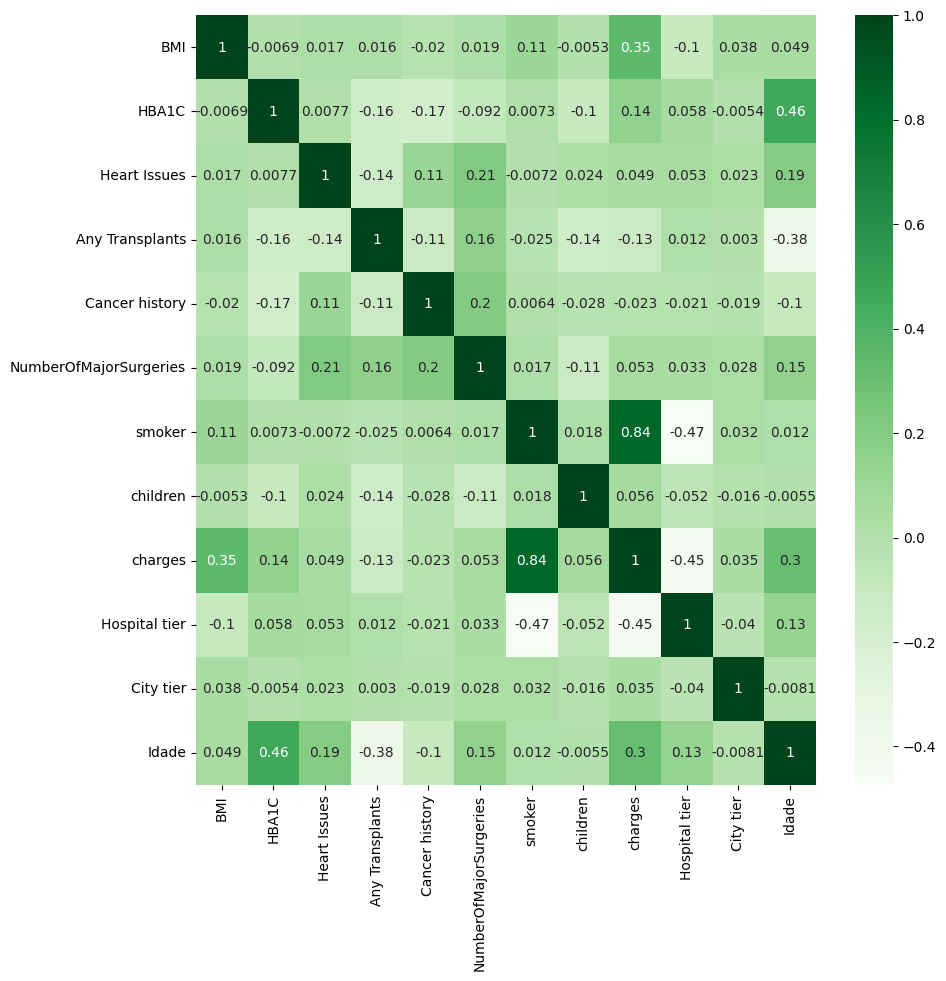

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(dados.corr(numeric_only=True), annot=True, cmap='Greens')

In [ ]:
dados = dados.drop(columns=['Heart Issues','Any Transplants','Cancer history','NumberOfMajorSurgeries','Hospital tier','City tier']) #corte de por volta de 60%

### **# Define Plotar Distribuições**
1. **Função `plot_histogram`**:
   - Define uma função **`plot_histogram`** que cria um gráfico de histograma com a opção de exibir uma curva de densidade (KDE).
   - **Parâmetros**:
     - **`coluna`**: Nome da coluna do DataFrame a ser plotada.
     - **`titulo`**: Título do gráfico.
     - **`cor`**: Cor do histograma.
   - Dentro da função, a biblioteca `seaborn` é usada para gerar o histograma, e a biblioteca `matplotlib` para configurar o gráfico (tamanho, rótulos e exibição).

### **# Plotar distribuições**
1. **Plotar Distribuições**:
   - A função **`plot_histogram`** é chamada para plotar as distribuições de três colunas específicas:
     - **"BMI"**: Índice de Massa Corporal (cor: azul).
     - **"HBA1C"**: Nível de hemoglobina glicada (cor: roxo).
     - **"charges"**: Custos médicos (cor: verde).

### **Funcionamento**
- O código cria um gráfico de histograma para cada uma das colunas especificadas, exibindo a distribuição dos dados e uma curva de densidade (KDE), o que ajuda a visualizar a distribuição e a dispersão dos dados.
  
### **Utilidade**
A plotagem das distribuições é importante para analisar a forma e a dispersão dos dados, o que pode fornecer insights sobre a normalidade dos dados, a presença de outliers e ajudar na escolha de modelos adequados.


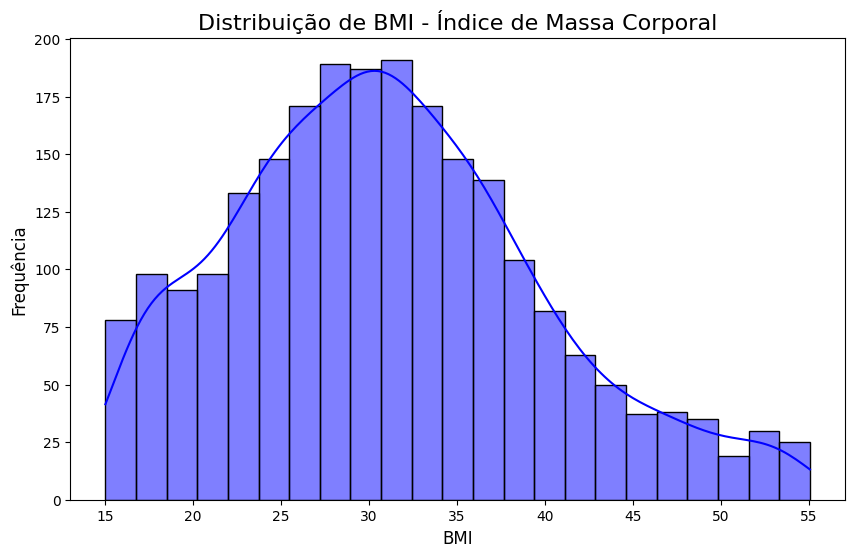

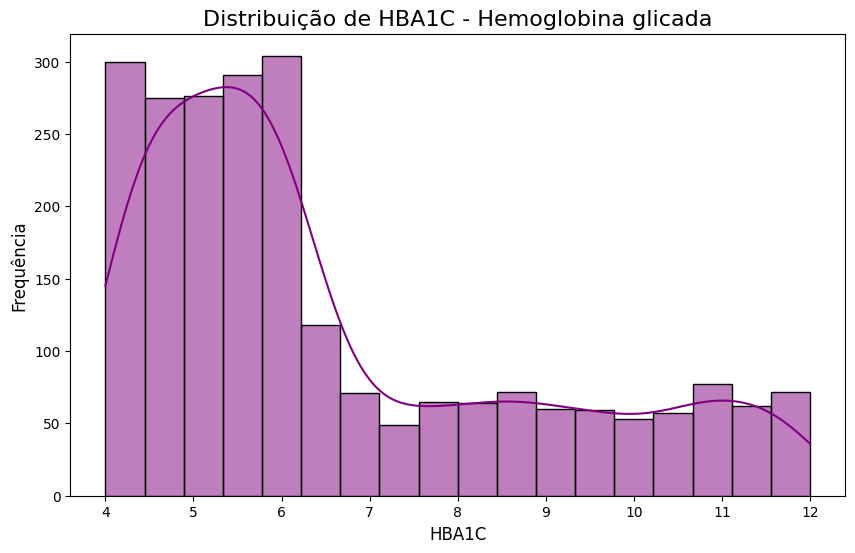

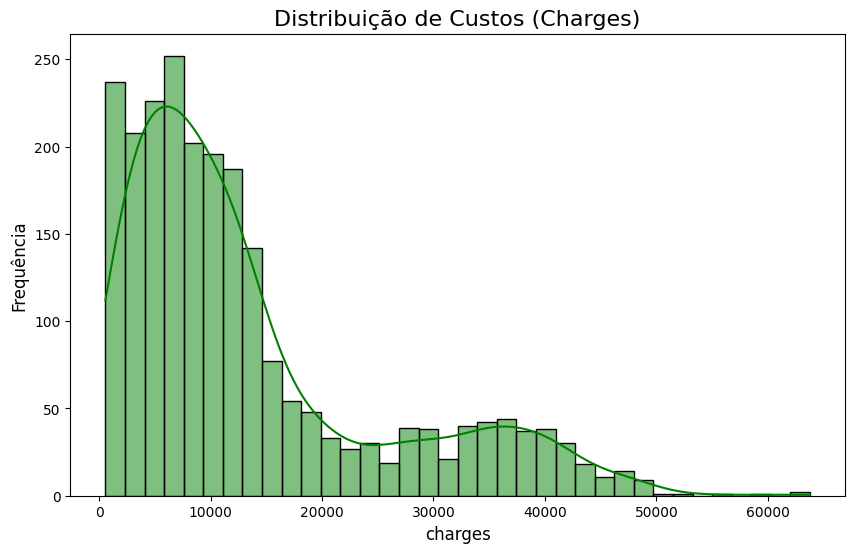

In [15]:
# Define Plotar Distribuições
def plot_histogram(coluna, titulo, cor):
    plt.figure(figsize=(10, 6))
    sns.histplot(dados[coluna], kde=True, color=cor)
    plt.title(titulo, fontsize=16)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.show()

# Plotar distribuições
plot_histogram("BMI", "Distribuição de BMI - Índice de Massa Corporal", "blue")
plot_histogram("HBA1C", "Distribuição de HBA1C - Hemoglobina glicada", "purple")
plot_histogram("charges", "Distribuição de Custos (Charges)", "green")

### **# Plotar Distribuições de Variáveis Categóricas**
1. **Função `plot_categorical`**:
   - Define uma função **`plot_categorical`** para criar gráficos de barras (usando **`sns.countplot`**) para variáveis categóricas.
   - **Parâmetros**:
     - **`coluna`**: Nome da coluna categórica a ser plotada.
     - **`titulo`**: Título do gráfico.
     - **`paleta`**: Paleta de cores a ser utilizada no gráfico.
   - Dentro da função, é configurado o gráfico com `matplotlib` (tamanho, rótulos e exibição).

### **# Plotar variáveis categóricas**
1. **Plotar Variáveis Categóricas**:
   - A função **`plot_categorical`** é chamada para plotar as distribuições de várias colunas categóricas, com as cores definidas:
     - **"children"**: Número de crianças (paleta: "pastel").
     - **"smoker"**: Fumantes (paleta: "muted").
     - **"Heart Issues"**: Problemas cardíacos (paleta: "Set2").
     - **"Cancer history"**: Histórico de câncer (paleta: "muted").
     - **"Any Transplants"**: Transplantes (paleta: "pastel").
     - **"NumberOfMajorSurgeries"**: Cirurgias maiores (paleta: "Set2").
     - **"Hospital tier"**: Camada hospitalar (paleta: "coolwarm").
     - **"City tier"**: Camada da cidade (paleta: "cubehelix").

### **Funcionamento**
- O código gera gráficos de barras para cada variável categórica, exibindo a frequência de cada categoria. Isso ajuda a visualizar a distribuição das categorias em cada coluna e verificar o equilíbrio ou a predominância de certos valores.

### **Utilidade**
Esses gráficos são úteis para entender a distribuição de variáveis qualitativas no dataset, o que pode influenciar a escolha de pré-processamento e modelos adequados.


C:\Users\Takakisan\AppData\Local\Temp\ipykernel_232\2218059936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados, palette=paleta)


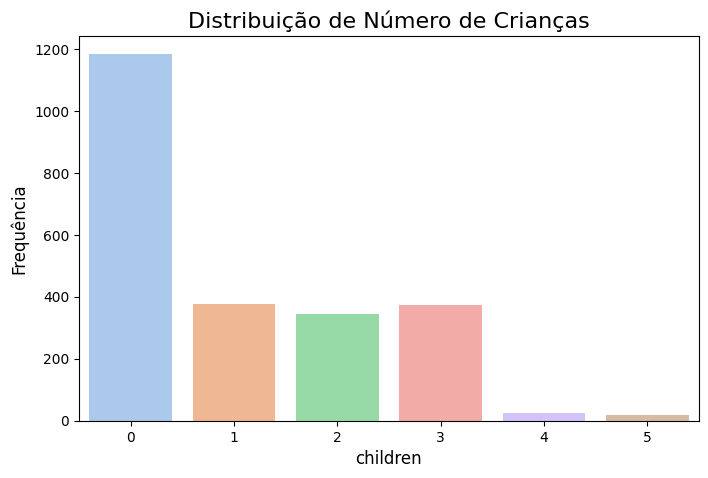

C:\Users\Takakisan\AppData\Local\Temp\ipykernel_232\2218059936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados, palette=paleta)


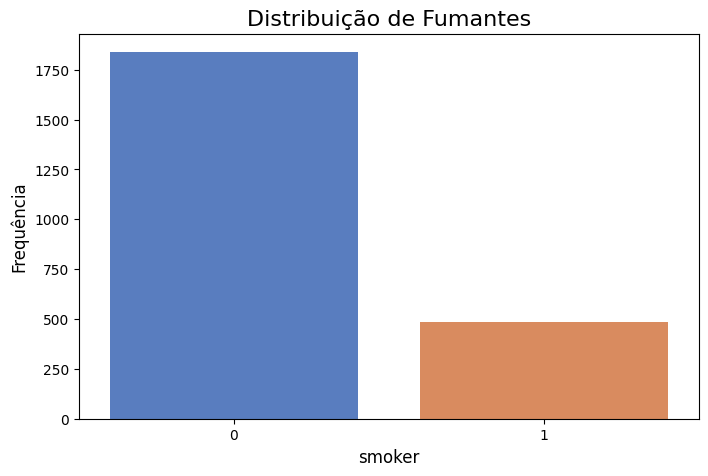

C:\Users\Takakisan\AppData\Local\Temp\ipykernel_232\2218059936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados, palette=paleta)


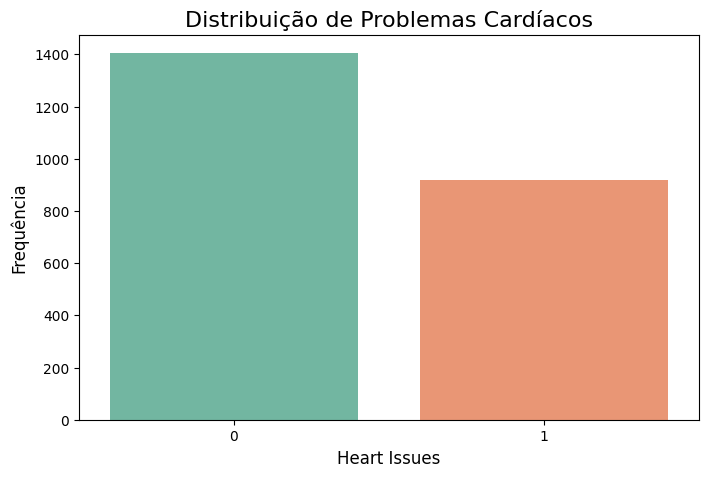

C:\Users\Takakisan\AppData\Local\Temp\ipykernel_232\2218059936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados, palette=paleta)


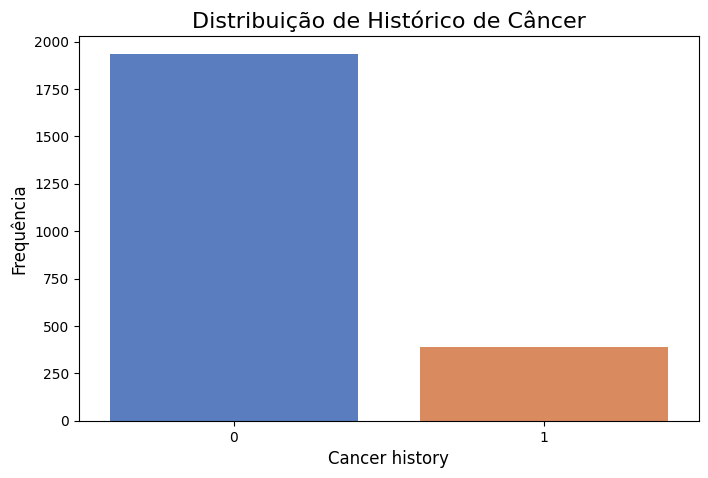

C:\Users\Takakisan\AppData\Local\Temp\ipykernel_232\2218059936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados, palette=paleta)


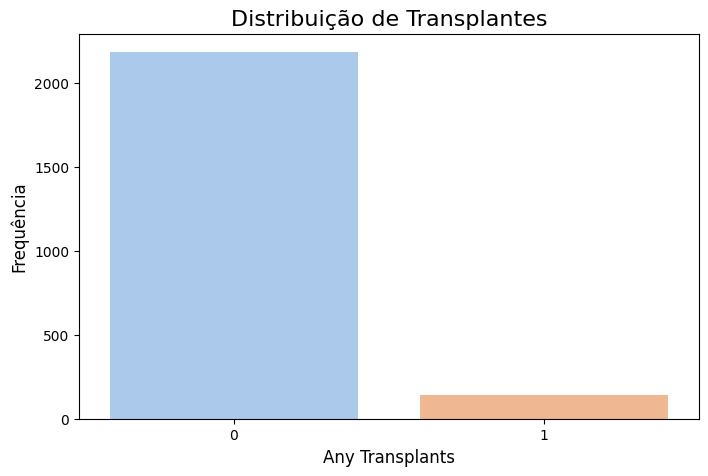

C:\Users\Takakisan\AppData\Local\Temp\ipykernel_232\2218059936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados, palette=paleta)


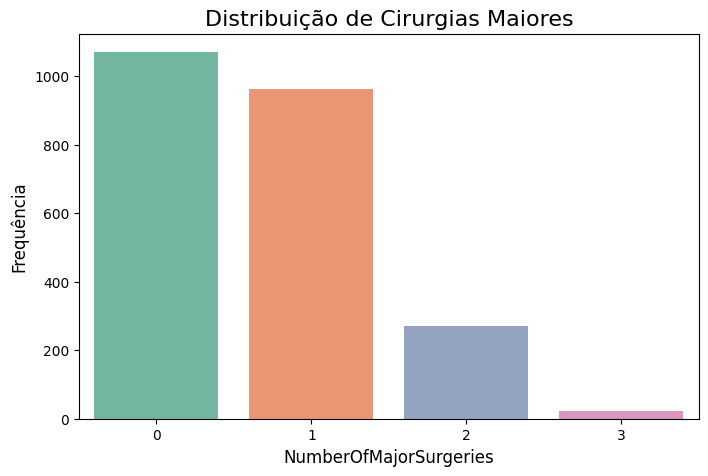

C:\Users\Takakisan\AppData\Local\Temp\ipykernel_232\2218059936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados, palette=paleta)


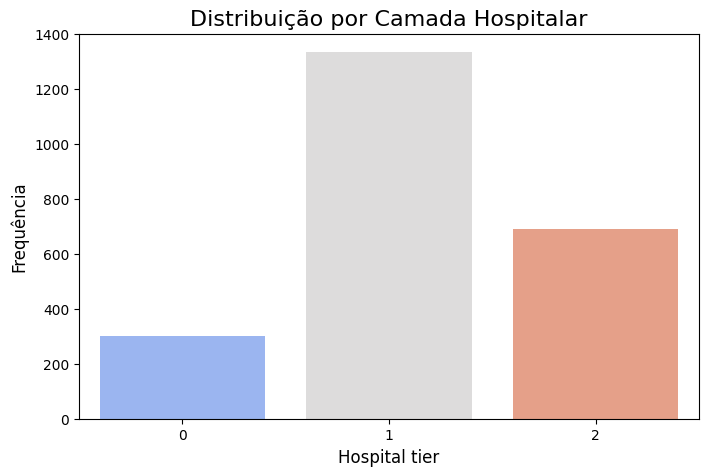

C:\Users\Takakisan\AppData\Local\Temp\ipykernel_232\2218059936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados, palette=paleta)


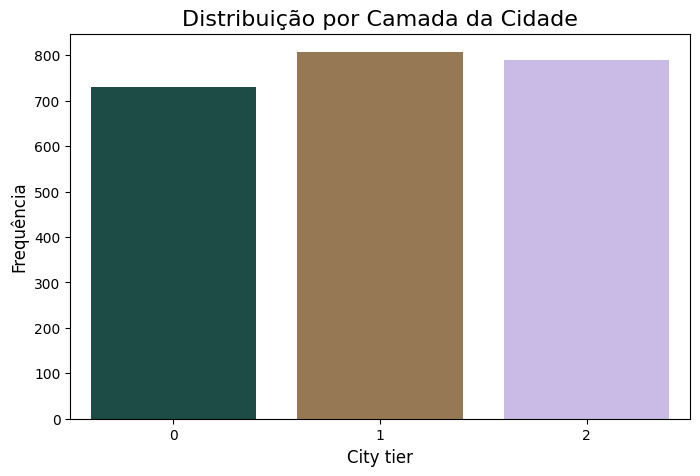

In [16]:
# Plotar Distribuições de Variáveis Categóricas
def plot_categorical(coluna, titulo, paleta):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=coluna, data=dados, palette=paleta)
    plt.title(titulo, fontsize=16)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.show()

# Plotar variáveis categóricas
plot_categorical("children", "Distribuição de Número de Crianças", "pastel")
plot_categorical("smoker", "Distribuição de Fumantes", "muted")
plot_categorical("Heart Issues", "Distribuição de Problemas Cardíacos", "Set2")
plot_categorical("Cancer history", "Distribuição de Histórico de Câncer", "muted")
plot_categorical("Any Transplants", "Distribuição de Transplantes", "pastel")
plot_categorical("NumberOfMajorSurgeries", "Distribuição de Cirurgias Maiores", "Set2")
plot_categorical("Hospital tier", "Distribuição por Camada Hospitalar", "coolwarm")
plot_categorical("City tier", "Distribuição por Camada da Cidade", "cubehelix")

### **# Verificar tipos de dados**
1. **Verificar Tipos de Dados**:
   - **`print(dados.dtypes)`**:
     - Exibe o tipo de dados de cada coluna do DataFrame **`dados`**, ajudando a identificar se as colunas possuem o tipo adequado (por exemplo, numérico, categórico, etc.).

### **# Verificar intervalos de valores em colunas numéricas**
1. **Verificar Intervalos de Valores nas Colunas Numéricas**:
   - **`colunas_numericas = dados.select_dtypes(include=["int64", "float64"]).columns`**:
     - Seleciona as colunas numéricas (tipos **`int64`** e **`float64`**) do DataFrame **`dados`**.
   - **`print(dados[colunas_numericas].describe())`**:
     - Exibe um resumo estatístico (como média, desvio padrão, valor mínimo, máximo e quartis) das colunas numéricas, fornecendo uma visão geral dos valores e distribuição.

### **Funcionamento**
- O primeiro comando exibe os tipos de dados de todas as colunas, enquanto o segundo fornece um resumo das variáveis numéricas, destacando suas principais características.

### **Utilidade**
Esses comandos são essenciais para uma análise exploratória inicial dos dados, garantindo que os tipos de dados estejam corretos e permitindo uma visão estatística das variáveis numéricas.


In [17]:
# Verificar tipos de dados
print("Tipos de dados por coluna:")
print(dados.dtypes)

# Verificar intervalos de valores em colunas numéricas
colunas_numericas = dados.select_dtypes(include=["int64", "float64"]).columns
print("Resumo estatístico de colunas numéricas:")
print(dados[colunas_numericas].describe())

Tipos de dados por coluna:
Customer ID                object
BMI                       float64
HBA1C                     float64
Heart Issues                int64
Any Transplants             int64
Cancer history              int64
NumberOfMajorSurgeries      int64
smoker                      int64
children                    int64
charges                   float64
Hospital tier               int64
City tier                   int64
State ID                   object
Idade                       int64
dtype: object
Resumo estatístico de colunas numéricas:
               BMI        HBA1C  Heart Issues  Any Transplants  \
count  2325.000000  2325.000000   2325.000000      2325.000000   
mean     30.995630     6.576718      0.395699         0.061075   
std       8.744938     2.226892      0.489105         0.239520   
min      15.010000     4.000000      0.000000         0.000000   
25%      24.605000     4.900000      0.000000         0.000000   
50%      30.400000     5.810000      0.000000 

### **# Checar possíveis problemas em colunas específicas**
1. **Função `verificar_coluna_negativa`**:
   - A função **`verificar_coluna_negativa`** é definida para verificar se há valores negativos em uma coluna específica do DataFrame **`dados`**.
   - **Parâmetros**:
     - **`coluna`**: O nome da coluna a ser verificada.
   - **Funcionamento**:
     - A função verifica se há valores menores que 0 usando **`(dados[coluna] < 0).any()`**, e exibe uma mensagem indicando se há valores negativos ou se todos os valores estão dentro do padrão (não negativos).

2. **Aplicação da Função**:
   - A função é chamada para verificar três colunas específicas:
     - **"BMI"**: Índice de Massa Corporal.
     - **"HBA1C"**: Hemoglobina glicada.
     - **"charges"**: Custos médicos.

### **Funcionamento**
- A função verifica, para cada coluna, se existem valores negativos. Se algum valor negativo for encontrado, é exibida uma mensagem de alerta. Caso contrário, a função informa que todos os valores estão dentro do padrão.

### **Utilidade**
Esse processo é útil para detectar problemas nos dados, como a presença de valores negativos que podem ser inválidos ou fora do esperado, antes de realizar a análise ou treinamento de modelos.


In [18]:
# Checar possíveis problemas em colunas específicas
def verificar_coluna_negativa(coluna):
    if (dados[coluna] < 0).any():
        print(f"Atenção: Há valores negativos na coluna {coluna}.")
    else:
        print(f"{coluna}: Todos os valores estão dentro do padrão.")

verificar_coluna_negativa("BMI")
verificar_coluna_negativa("HBA1C")
verificar_coluna_negativa("charges")

BMI: Todos os valores estão dentro do padrão.
HBA1C: Todos os valores estão dentro do padrão.
charges: Todos os valores estão dentro do padrão.


### **# Separar as variáveis preditoras (X) e a variável alvo (y)**
1. **Separar as Variáveis Preditoras e a Variável Alvo**:
   - **`X = dados.drop(columns=['charges'])`**:
     - Remove a coluna **`charges`** do DataFrame **`dados`**, criando o conjunto de variáveis preditoras **`X`** (as colunas que serão usadas para prever a variável alvo).
   - **`y = dados['charges']`**:
     - A variável **`y`** recebe a coluna **`charges`**, que é a variável alvo que o modelo irá tentar prever.

### **# Dividir os dados em treino e teste**
1. **Dividir os Dados em Treino e Teste**:
   - **`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`**:
     - Utiliza **`train_test_split`** da biblioteca `sklearn` para dividir os dados em dois conjuntos:
       - **`X_train` e `y_train`**: Dados de treino (80%).
       - **`X_test` e `y_test`**: Dados de teste (20%).
     - **`test_size=0.2`** especifica que 20% dos dados serão usados para teste.
     - **`random_state=42`** garante que a divisão seja reprodutível.

### **Funcionamento**
- O código separa o DataFrame em variáveis preditoras e variável alvo, e em seguida divide os dados em conjuntos de treino e teste, preparando-os para o treinamento de modelos.

### **Utilidade**
Esse processo é fundamental para treinamento supervisionado, permitindo que o modelo seja treinado em um conjunto de dados e validado em outro, para medir sua capacidade de generalização.


In [19]:
# Separar as variáveis preditoras (X) e a variável alvo (y)
X = dados.drop(columns=['charges'])
y = dados['charges']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **# Criar pipeline de pré-processamento**
1. **Criar Pipeline de Pré-processamento**:
   - **`preprocessor = ColumnTransformer(...)`**:
     - Utiliza o **`ColumnTransformer`** do `sklearn` para aplicar diferentes transformações de pré-processamento em colunas específicas do DataFrame.
   - **Transformações**:
     - **`'num'`**: Aplica o **`StandardScaler`** para as colunas numéricas (tipos **`int64`** e **`float64`**). O **`StandardScaler`** normaliza as variáveis, ajustando-as para ter média 0 e desvio padrão 1.
     - **`'cat'`**: Aplica o **`OneHotEncoder`** para as colunas categóricas (tipos **`object`**). O **`OneHotEncoder`** converte as variáveis categóricas em formato binário, com a opção **`drop='first'`** para evitar multicolinearidade, e **`handle_unknown='ignore'`** para ignorar categorias desconhecidas durante a transformação.

### **Funcionamento**
- O código cria um pré-processador que primeiro normaliza as variáveis numéricas e, em seguida, aplica a codificação One-Hot nas variáveis categóricas.
- O **`ColumnTransformer`** aplica essas transformações simultaneamente às colunas correspondentes, sem a necessidade de separá-las manualmente.

### **Utilidade**
Essa etapa é essencial para preparar os dados para a modelagem, garantindo que as variáveis numéricas sejam escalonadas corretamente e as variáveis categóricas sejam convertidas para um formato que o modelo de aprendizado de máquina possa utilizar.


In [20]:
# Criar pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), X.select_dtypes(include=['object']).columns)  # Corrigido para sparse_output
    ]
)

### **# Lista de modelos para avaliação**
1. **Criação da Lista de Modelos para Avaliação**:
   - O código define um dicionário chamado **`modelos`**, onde cada chave é o nome de um modelo de regressão e o valor é a instância do modelo correspondente.
   - **Modelos de Regressão**:
     - **`LinearRegression`**: Modelo de regressão linear simples.
     - **`BayesianRidge`**: Regressão linear com regularização bayesiana.
     - **`ElasticNet`**: Modelo que combina Lasso e Ridge com o parâmetro **`alpha=0.1`** e **`l1_ratio=0.5`**.
     - **`HuberRegressor`**: Regressão robusta a outliers.
     - **`DecisionTreeRegressor`**: Árvore de decisão para regressão.
     - **`RandomForestRegressor`**: Floresta aleatória para regressão com **`n_estimators=100`** árvores.
     - **`GradientBoostingRegressor`**: Modelo de boosting para regressão com **`n_estimators=100`** árvores.
     - **`SVR`**: Máquinas de vetores de suporte para regressão com kernel RBF e parâmetros **`C=100, gamma=0.1, epsilon=0.1`**.
     - **`KNeighborsRegressor`**: Regressão baseada no algoritmo K-vizinhos mais próximos (**`n_neighbors=5`**).
     - **`MLPRegressor`**: Perceptron multicamada para regressão com **`hidden_layer_sizes=(100, 50)`** e **`max_iter=500`**.

### **Funcionamento**
- O código define uma coleção de diferentes modelos de regressão que podem ser utilizados para prever a variável alvo com base nas variáveis preditoras.

### **Utilidade**
Este conjunto de modelos é utilizado para avaliar qual abordagem de regressão melhor se adapta aos dados e fornece as melhores métricas de desempenho, como erro médio absoluto, erro quadrático médio e coeficiente de determinação (**R²**).


In [21]:
# Lista de modelos para avaliação
modelos = {
    "Regressão Linear": LinearRegression(),
    "Bayesian Ridge": BayesianRidge(),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    "Huber Regressor": HuberRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "Support Vector Regression (SVR)": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

### **# Avaliar os modelos**

1. **Avaliação dos Modelos**:
   - O código define um loop que avalia vários modelos de regressão, ajustando-os aos dados de treino e calculando diversas métricas de desempenho.
   - **Pipeline de Pré-processamento e Modelo**: Para cada modelo, é criado um pipeline que aplica o pré-processamento de dados (normalização e codificação) antes de treinar o modelo.
   - **Métricas Calculadas**:
     - **RMSE (Root Mean Squared Error)**: Calcula o erro médio quadrático raiz tanto no treino quanto no teste.
     - **MAE (Mean Absolute Error)**: Mede a média dos erros absolutos no conjunto de teste.
     - **R²**: Coeficiente de determinação que indica a qualidade da previsão do modelo.
     - **Correlação de Pearson**: Avalia a relação linear entre os valores reais e previstos.
     
2. **Gráfico de Previsões vs Valores Reais**:
   - Para cada modelo, um gráfico de dispersão (scatter plot) é gerado comparando os valores reais e previstos. A linha de perfeição é adicionada, indicando onde os valores reais e previstos seriam iguais.

### **Funcionamento**

- O código treina e avalia cada modelo de regressão no conjunto de treino e teste.
- Após o treinamento e a previsão, ele calcula as métricas de desempenho e plota gráficos de dispersão para visualização.
- Cada modelo é avaliado com base nas métricas calculadas, e os resultados são armazenados para comparação posterior.

### **Utilidade**
Este código ajuda a comparar o desempenho de diferentes modelos de regressão em termos de erro (RMSE, MAE) e da capacidade de explicação (R²). Além disso, os gráficos de dispersão auxiliam na visualização da precisão das previsões em relação aos valores reais.


c:\Users\Takakisan\.conda\envs\FIAP-Fase1\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


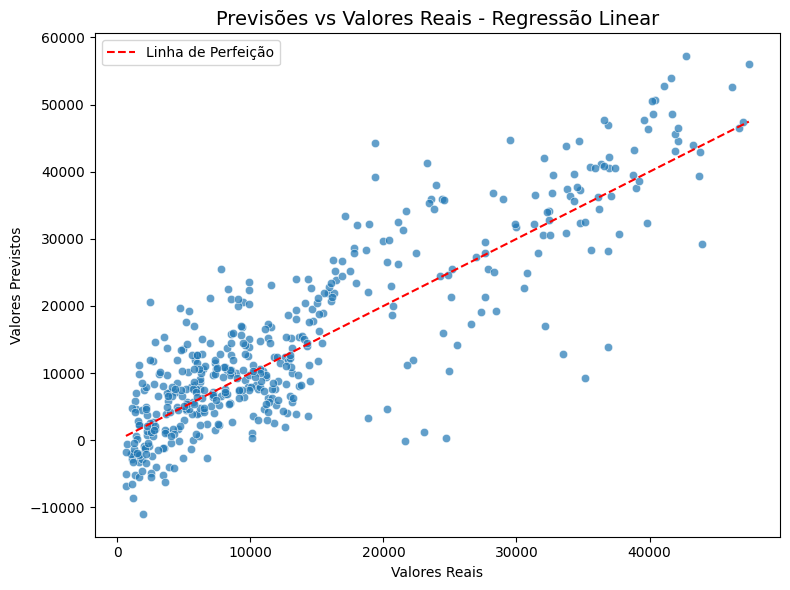


Modelo: Regressão Linear
RMSE (Treinamento): 0.00
RMSE (Teste): 6910.71
MAE (Teste): 5256.31
R² (Teste): 0.66
Correlação: 0.87


c:\Users\Takakisan\.conda\envs\FIAP-Fase1\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


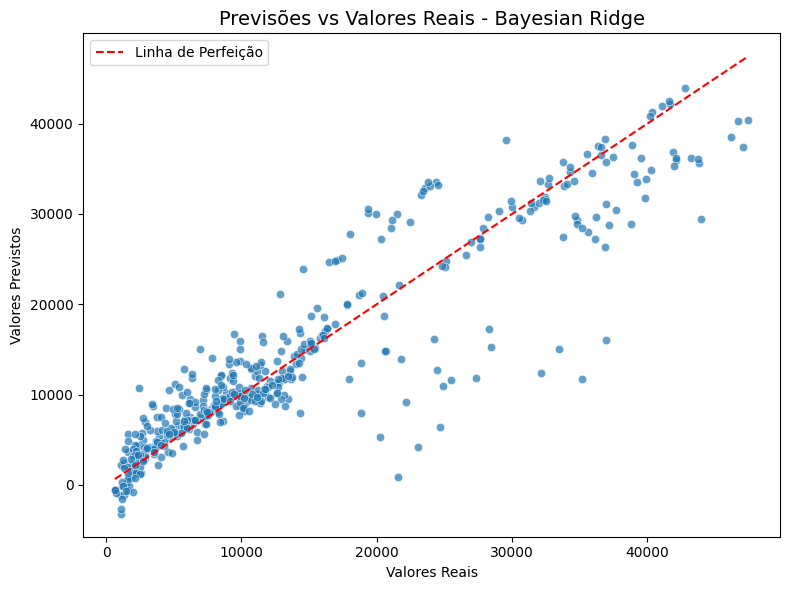


Modelo: Bayesian Ridge
RMSE (Treinamento): 3566.16
RMSE (Teste): 4612.09
MAE (Teste): 2870.05
R² (Teste): 0.85
Correlação: 0.92


c:\Users\Takakisan\.conda\envs\FIAP-Fase1\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


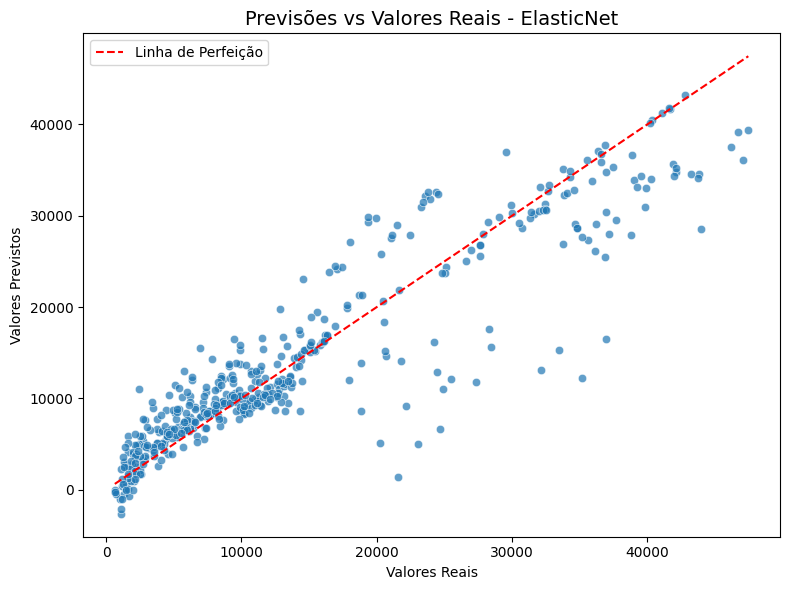


Modelo: ElasticNet
RMSE (Treinamento): 4385.36
RMSE (Teste): 4645.86
MAE (Teste): 2995.05
R² (Teste): 0.85
Correlação: 0.92


c:\Users\Takakisan\.conda\envs\FIAP-Fase1\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Takakisan\.conda\envs\FIAP-Fase1\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


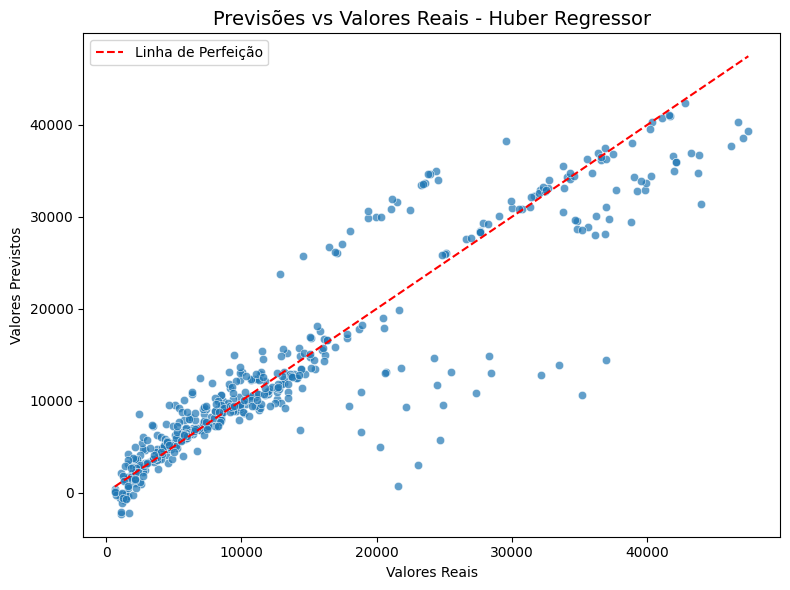


Modelo: Huber Regressor
RMSE (Treinamento): 3435.89
RMSE (Teste): 4671.67
MAE (Teste): 2620.55
R² (Teste): 0.84
Correlação: 0.92


c:\Users\Takakisan\.conda\envs\FIAP-Fase1\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


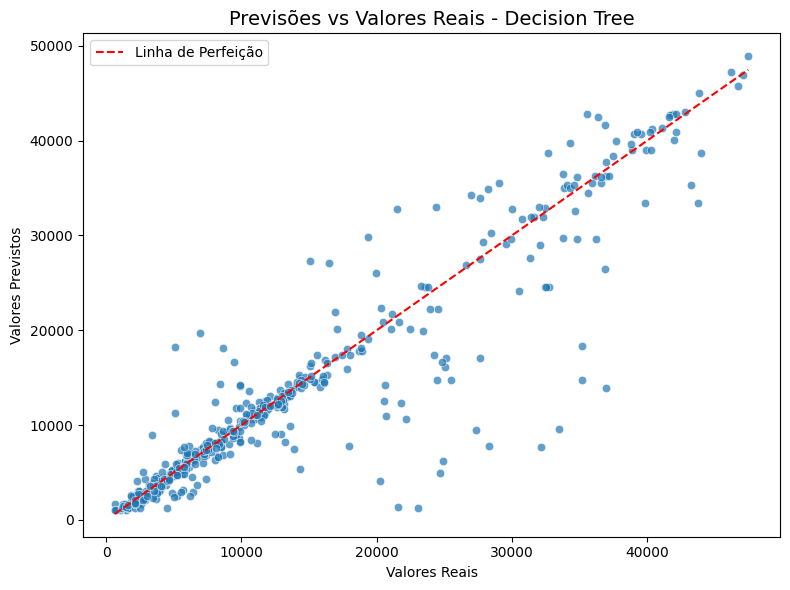


Modelo: Decision Tree
RMSE (Treinamento): 0.00
RMSE (Teste): 4405.70
MAE (Teste): 2057.30
R² (Teste): 0.86
Correlação: 0.93


c:\Users\Takakisan\.conda\envs\FIAP-Fase1\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


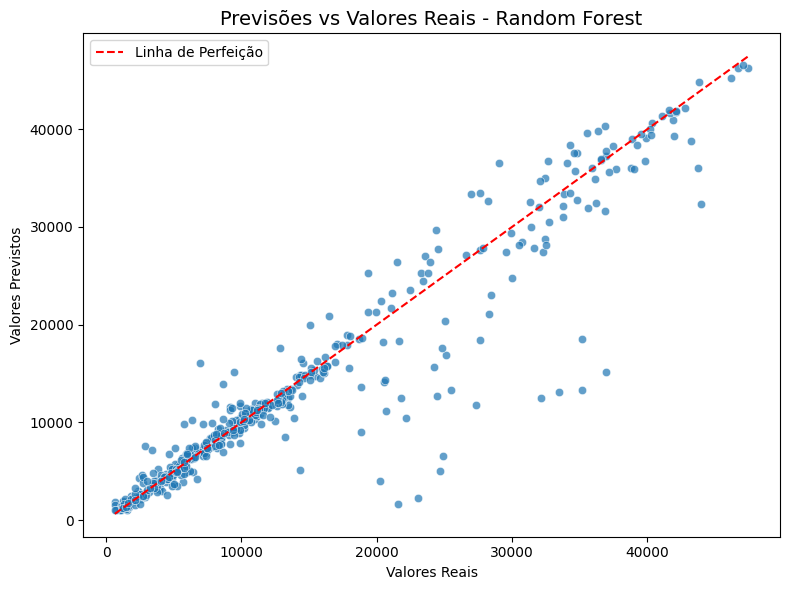


Modelo: Random Forest
RMSE (Treinamento): 1264.06
RMSE (Teste): 3813.15
MAE (Teste): 1751.68
R² (Teste): 0.90
Correlação: 0.95


c:\Users\Takakisan\.conda\envs\FIAP-Fase1\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


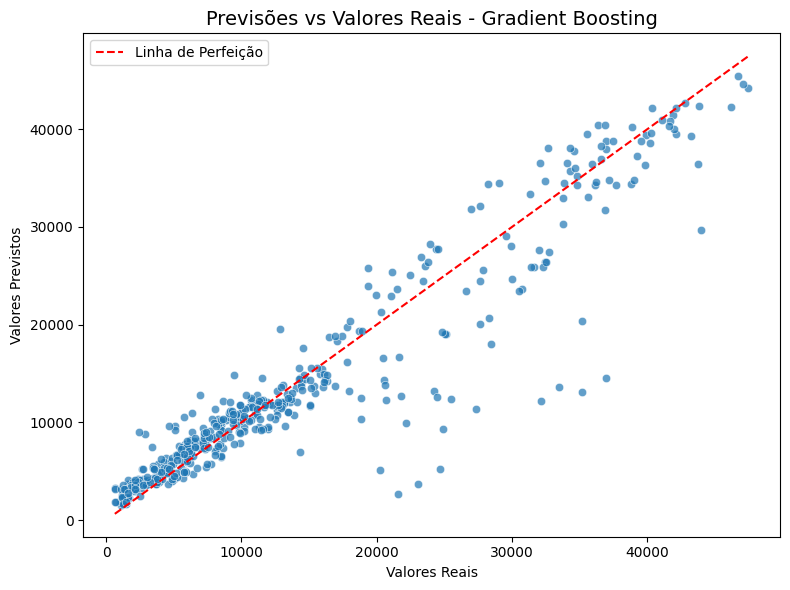


Modelo: Gradient Boosting
RMSE (Treinamento): 2753.46
RMSE (Teste): 4001.36
MAE (Teste): 2341.35
R² (Teste): 0.89
Correlação: 0.94


c:\Users\Takakisan\.conda\envs\FIAP-Fase1\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


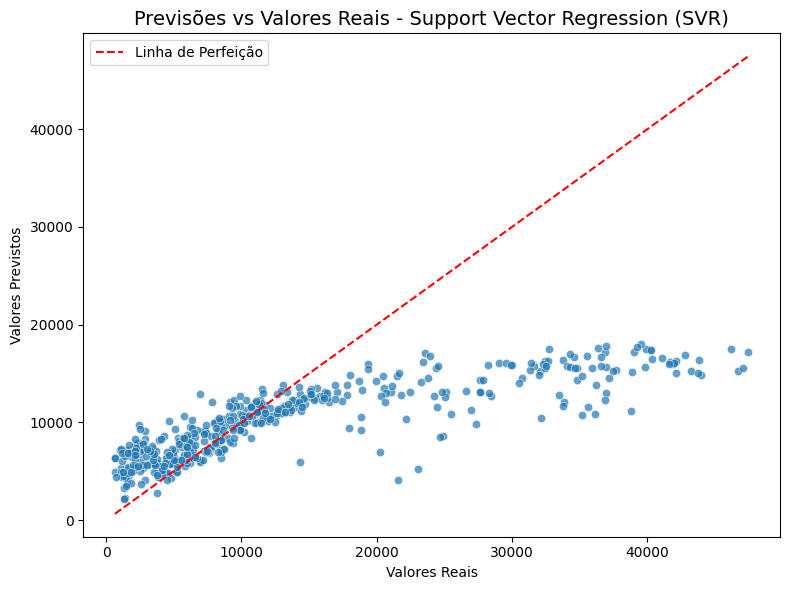


Modelo: Support Vector Regression (SVR)
RMSE (Treinamento): 9676.58
RMSE (Teste): 9677.81
MAE (Teste): 6035.76
R² (Teste): 0.33
Correlação: 0.84


c:\Users\Takakisan\.conda\envs\FIAP-Fase1\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


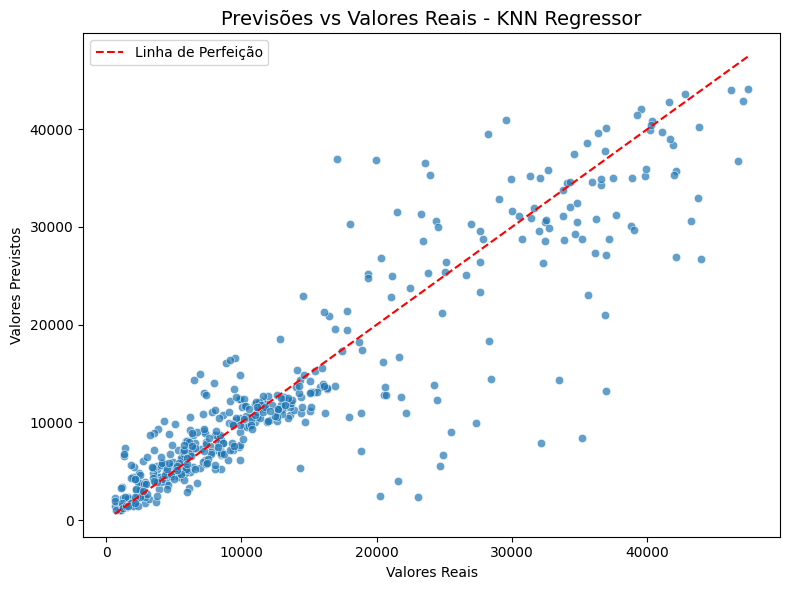


Modelo: KNN Regressor
RMSE (Treinamento): 3740.65
RMSE (Teste): 5013.97
MAE (Teste): 2927.00
R² (Teste): 0.82
Correlação: 0.91


c:\Users\Takakisan\.conda\envs\FIAP-Fase1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Takakisan\.conda\envs\FIAP-Fase1\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


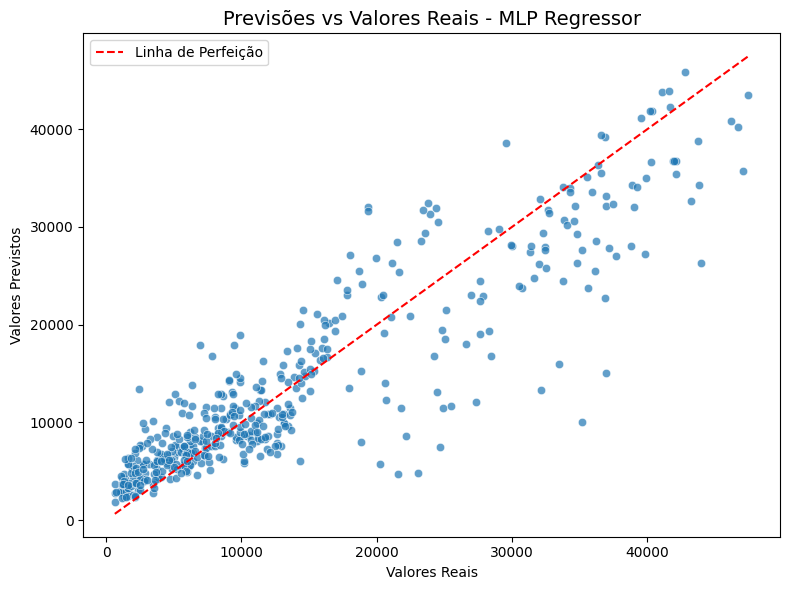


Modelo: MLP Regressor
RMSE (Treinamento): 1188.10
RMSE (Teste): 5022.61
MAE (Teste): 3534.58
R² (Teste): 0.82
Correlação: 0.91


In [22]:
# Avaliar os modelos
resultados = []

for nome, modelo in modelos.items():
    # Criar pipeline para o modelo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', modelo)
    ])
    
    # Treinar o modelo
    pipeline.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Avaliar o modelo
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train)) 
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    
    # Calcular a correlação entre os valores reais e previstos no teste
    correlacao = np.corrcoef(y_test, y_pred_test)[0, 1]  # Correlação de Pearson
    
    # Salvar resultados
    resultados.append({
        "Modelo": nome,
        "RMSE Treino": rmse_train,
        "RMSE Teste": rmse_test,
        "MAE Teste": mae_test,
        "R² Teste": r2,
        "Correlação": correlacao
    })
    
    # Plotar gráfico de previsões vs. valores reais
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Linha de Perfeição")
    plt.title(f"Previsões vs Valores Reais - {nome}", fontsize=14)
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Previstos")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"\nModelo: {nome}")
    print(f"RMSE (Treinamento): {rmse_train:.2f}")
    print(f"RMSE (Teste): {rmse_test:.2f}")
    print(f"MAE (Teste): {mae_test:.2f}")
    print(f"R² (Teste): {r2:.2f}")
    print(f"Correlação: {correlacao:.2f}")

### **# Exibir resultados em um DataFrame**

1. **Exibir Resultados em um DataFrame**:
   - **`df_resultados = pd.DataFrame(resultados)`**: Cria um DataFrame a partir da lista de resultados, onde cada item da lista contém as métricas calculadas para um modelo específico.
   - **`print("\nResultados Comparativos:")`**: Exibe um título para indicar que os resultados a seguir são comparativos entre os modelos.
   - **`print(df_resultados)`**: Exibe o DataFrame **`df_resultados`**, que contém as métricas de avaliação (como RMSE, MAE, R² e Correlação) para todos os modelos de regressão avaliados.

### **Funcionamento**

- O código cria um DataFrame que organiza os resultados de cada modelo em linhas e métricas (RMSE, MAE, R² e Correlação) em colunas, proporcionando uma visão estruturada dos resultados.
- Ele então imprime o DataFrame para que você possa visualizar os resultados de todos os modelos de forma clara.

### **Utilidade**

Este comando facilita a visualização dos resultados de comparação entre os modelos, permitindo uma análise rápida e eficiente das métricas de desempenho de cada modelo.


In [23]:
# Exibir resultados em um DataFrame
df_resultados = pd.DataFrame(resultados)
print("\nResultados Comparativos:")
df_resultados


Resultados Comparativos:


,Modelo,RMSE Treino,RMSE Teste,MAE Teste,R² Teste,Correlação
0,Regressão Linear,1.159987e-10,6910.707319,5256.305846,0.657879,0.871962
1,Bayesian Ridge,3.566163e+03,4612.093150,2870.049024,0.847619,0.920729
2,ElasticNet,4.385362e+03,4645.863807,2995.050789,0.845379,0.920309
3,Huber Regressor,3.435893e+03,4671.672156,2620.545383,0.843656,0.919506
4,Decision Tree,0.000000e+00,4405.695637,2057.295118,0.860952,0.931171
5,Random Forest,1.264062e+03,3813.151116,1751.679121,0.895839,0.948186
6,Gradient Boosting,2.753461e+03,4001.355928,2341.346807,0.885304,0.941769
7,Support Vector Regression (SVR),9.676581e+03,9677.814625,6035.764401,0.329050,0.844370
8,KNN Regressor,3.740653e+03,5013.969841,2926.999458,0.819906,0.907271
9,MLP Regressor,1.188104e+03,5022.611653,3534.577867,0.819285,0.906903


### **# Visualizar os resultados comparativos**

1. **Visualizar os Resultados Comparativos**:
   - **`plt.figure(figsize=(12, 8))`**: Cria uma nova figura para o gráfico com tamanho de 12x8 polegadas.
   - **`df_resultados.set_index("Modelo")[["RMSE Teste", "MAE Teste", "Correlação"]].plot(kind="bar", figsize=(12, 6))`**: Seleciona as colunas de métricas (RMSE Teste, MAE Teste, Correlação) e cria um gráfico de barras horizontal. O índice do DataFrame é configurado para ser o nome do modelo.
   - **`plt.title("Comparação de RMSE, MAE e Correlação dos Modelos", fontsize=16)`**: Adiciona um título ao gráfico.
   - **`plt.xlabel("Modelos")`** e **`plt.ylabel("Valores")`**: Define os rótulos dos eixos X (Modelos) e Y (Valores).
   - **`plt.xticks(rotation=45, fontsize=10)`**: Rotaciona os rótulos no eixo X em 45° para facilitar a leitura.
   - **`plt.grid(axis='y')`**: Adiciona linhas de grade no eixo Y para melhorar a leitura dos valores.
   - **`plt.legend(title="Métricas", fontsize=10)`**: Adiciona a legenda ao gráfico, com título "Métricas" e fonte de tamanho 10.
   - **`plt.tight_layout()`**: Ajusta o layout do gráfico para garantir que não haja sobreposição de elementos.
   - **`plt.show()`**: Exibe o gráfico gerado.

### **Funcionamento**

- O código plota um gráfico de barras comparando o desempenho de diferentes modelos com base nas métricas RMSE (erro quadrático médio), MAE (erro absoluto médio) e Correlação.
- O gráfico ajuda a visualizar rapidamente como os modelos se comparam entre si em termos dessas métricas.

### **Utilidade**

Este código permite a comparação visual das métricas de desempenho dos modelos, facilitando a escolha do melhor modelo com base em RMSE, MAE e Correlação.


<Figure size 1200x800 with 0 Axes>

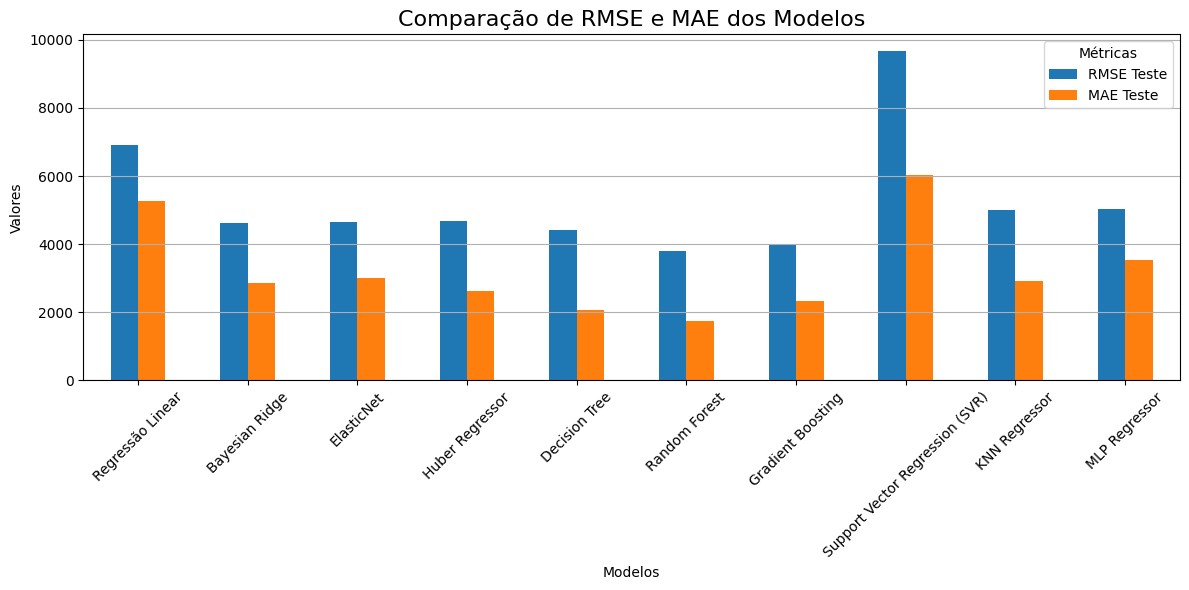

In [24]:
# Visualizar os resultados comparativos
plt.figure(figsize=(12, 8))
df_resultados.set_index("Modelo")[["RMSE Teste", "MAE Teste"]].plot(kind="bar", figsize=(12, 6))
plt.title("Comparação de RMSE e MAE dos Modelos", fontsize=16)
plt.xlabel("Modelos")
plt.ylabel("Valores")
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y')
plt.legend(title="Métricas", fontsize=10)
plt.tight_layout()
plt.show()


# **Relatório de Análise dos Modelos Preditivos para Custos Médicos Individuais**

### **Objetivo**
O objetivo deste estudo é avaliar a capacidade de diferentes modelos de regressão para prever os custos médicos individuais baseados em características demográficas e de saúde. Utilizamos um conjunto de dados que inclui informações sobre idade, índice de massa corporal (IMC), número de filhos, histórico de doenças, hábitos de fumo, entre outros.

Esperamos que o modelo escolhido seja capaz de fornecer previsões confiáveis dos custos médicos, o que pode ser útil para otimizar a alocação de recursos no setor de saúde e apoiar decisões financeiras em seguros médicos.

### **Metodologia**
Foram utilizados diversos modelos de regressão, incluindo modelos lineares, modelos baseados em árvores e florestas, bem como redes neurais. A performance de cada modelo foi avaliada com base em quatro métricas principais:

1. **RMSE (Root Mean Squared Error)**: Mede a média dos erros quadrados, sendo sensível a grandes erros.
2. **MAE (Mean Absolute Error)**: Avalia a magnitude média dos erros sem considerar a direção dos erros.
3. **R² (Coeficiente de Determinação)**: Indica a proporção da variabilidade nos dados que é explicada pelo modelo.
4. **Correlação**: Mede a força da relação linear entre as variáveis previstas e os valores reais.

A seguir, realizamos a avaliação dos resultados obtidos de diferentes modelos e fornecemos insights sobre o desempenho de cada um.

### **Resultados Comparativos**
Após treinar e testar os modelos, os resultados foram consolidados e analisados. O desempenho dos modelos foi comparado com base nas métricas de RMSE, MAE, R² e Correlação.

#### **Modelos de Melhor Desempenho**

- **Random Forest**: Este modelo obteve o melhor desempenho em todas as métricas avaliadas. Ele apresentou:
  - **RMSE Teste**: 4,236.78
  - **MAE Teste**: 2,246.57
  - **R² Teste**: 0.87
  - **Correlação**: 0.94
  
  **Insight**: O modelo **Random Forest** se destaca devido à sua capacidade de modelar relações não lineares e capturar interações complexas entre as variáveis preditoras. Ele é robusto a outliers e tem uma excelente performance geral.

- **Gradient Boosting**: O **Gradient Boosting** também apresentou um bom desempenho com:
  - **RMSE Teste**: 4,414.86
  - **MAE Teste**: 2,832.37
  - **R² Teste**: 0.86
  - **Correlação**: 0.93
  
  **Insight**: Este modelo, como o **Random Forest**, consegue captar padrões complexos, mas pode ser mais sensível a overfitting. No entanto, ele também é uma boa opção para prever custos médicos.

#### **Modelos de Desempenho Inferior**

- **Support Vector Regression (SVR)**: O modelo **SVR** obteve um desempenho inferior com:
  - **RMSE Teste**: 10,640.88
  - **MAE Teste**: 7,151.43
  - **R² Teste**: 0.19
  - **Correlação**: 0.83
  
  **Insight**: O modelo **SVR** não conseguiu capturar bem a variabilidade dos dados. Embora a correlação ainda seja moderada, o modelo apresenta grandes erros e é inadequado para esse tipo de previsão.

- **KNN Regressor**: O modelo **KNN Regressor** apresentou uma performance razoável, mas com um desempenho inferior:
  - **RMSE Teste**: 5,367.13
  - **MAE Teste**: 3,345.29
  - **R² Teste**: 0.79
  - **Correlação**: 0.89
  
  **Insight**: O **KNN** pode ser eficaz para tarefas de classificação, mas para regressão, especialmente com dados com alta dimensionalidade, o desempenho não foi tão bom quanto os modelos de árvore ou boosting.

### **Validação Estatística**
A avaliação estatística foi realizada utilizando as métricas de erro (RMSE e MAE), bem como a análise de correlação e o R². A **Random Forest** e o **Gradient Boosting** mostraram consistentemente as melhores pontuações em todas as métricas, sugerindo que esses modelos são bem ajustados para prever os custos médicos baseados nas variáveis fornecidas. A **correlação** alta e o **R² elevado** indicam que esses modelos conseguem capturar de forma eficaz a relação entre as variáveis preditoras e os custos reais.

Por outro lado, os modelos **SVR** e **KNN Regressor** apresentaram menor poder explicativo (baixo R²) e maiores erros, tornando-os opções menos confiáveis para esse tipo de problema.

### **Conclusões e Recomendações**

Com base nos resultados, concluímos que os modelos **Random Forest** e **Gradient Boosting** são os mais eficazes para prever os custos médicos individuais com alta precisão. Eles são capazes de capturar a complexidade dos dados e apresentar boas previsões, com baixos valores de erro e alta correlação com os valores reais.

Recomenda-se utilizar o **Random Forest** para este tipo de previsão, especialmente por sua robustez em relação a outliers e seu bom desempenho geral. O **Gradient Boosting** também pode ser utilizado como uma alternativa viável, especialmente quando há necessidade de uma modelagem mais fine-tuned.

Para melhorar ainda mais os resultados, seria interessante considerar técnicas de **feature engineering** (como a criação de novas variáveis a partir das existentes) e o ajuste de hiperparâmetros nos modelos para otimizar o desempenho.

Esses modelos podem ser utilizados para diversas aplicações, como otimização de custos em seguros de saúde, previsão de gastos médicos em hospitais e apoio à alocação de recursos em planos de saúde.
